## StandardScaler 特徵縮放

In [1]:
from sklearn.preprocessing import StandardScaler
data = [[-1, 2],
         [-0.5, 6], 
         [0, 10], 
         [1, 18]]
scaler = StandardScaler(with_mean=True,with_std=True)
scaler.fit(data)
print(scaler.mean_,scaler.var_)

[-0.125  9.   ] [ 0.546875 35.      ]


In [2]:
data_new = scaler.transform(data)
print(data_new)

[[-1.18321596 -1.18321596]
 [-0.50709255 -0.50709255]
 [ 0.16903085  0.16903085]
 [ 1.52127766  1.52127766]]


## 使用NumPy驗算

In [3]:
import numpy as np

In [4]:
np.mean(data,axis=0)

array([-0.125,  9.   ])

In [5]:
np.var(data,axis=0)

array([ 0.546875, 35.      ])

In [6]:
#減 平均值 / 標準差 

In [10]:
(data - np.mean(data,axis=0))

array([[-0.875, -7.   ],
       [-0.375, -3.   ],
       [ 0.125,  1.   ],
       [ 1.125,  9.   ]])

In [9]:
(data - np.mean(data,axis=0)) / np.std(data,axis=0)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

## 資料還原

In [11]:
scaler.inverse_transform(data_new)

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

## 設定參數 with_mean=False，不改變轉換後的平均數

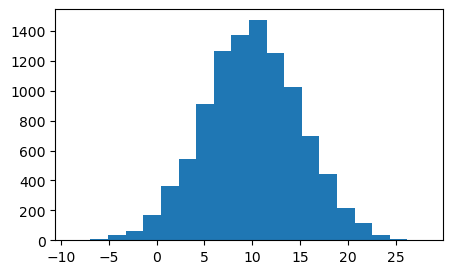

In [12]:
from matplotlib import pyplot as plt
import numpy as np
data = np.random.normal(10,5,10000)
plt.figure(figsize=(5,3))
plt.hist(data,20)
plt.show()

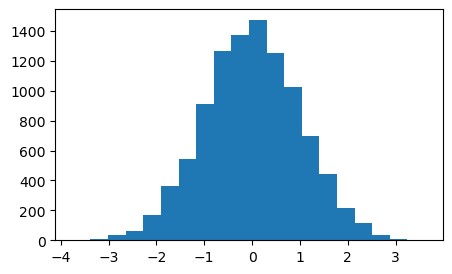

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_new  = scaler.fit_transform(data.reshape(-1,1))
plt.figure(figsize=(5,3))
plt.hist(data_new,20)
plt.show()

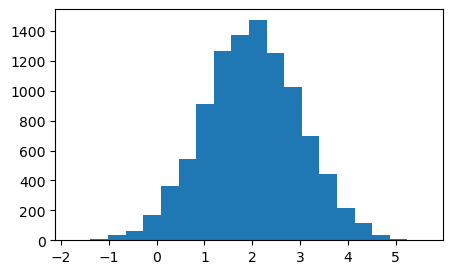

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
data_new = scaler.fit_transform(data.reshape(-1,1))
plt.figure(figsize=(5,3))
plt.hist(data_new,20)
plt.show()

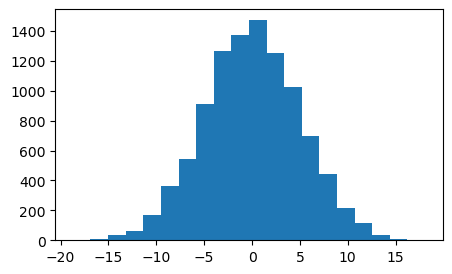

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_std=False)
data_new = scaler.fit_transform(data.reshape(-1,1))
plt.figure(figsize=(5,3))
plt.hist(data_new,20)
plt.show()

# 多重共線性(Multicollinearity)

In [18]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## 載入資料

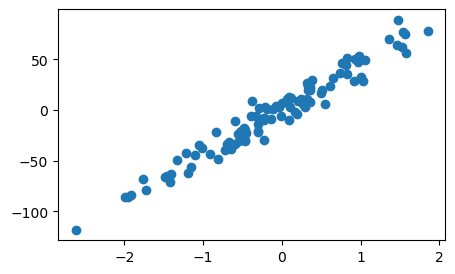

In [23]:
from sklearn.datasets import make_regression
X,y = make_regression(n_samples= 100,n_features=1,noise=10,random_state = 42)
plt.figure(figsize=(5,3))
plt.scatter(X,y)
plt.show()


## 迴歸

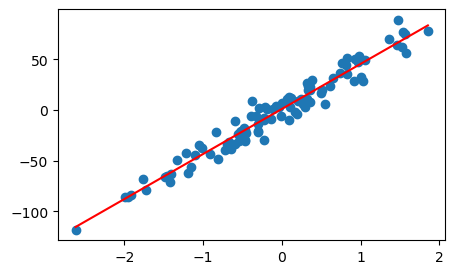

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)
X_pred = np.linspace(np.min(X.reshape(-1)),np.max(X.reshape(-1)),20)
y_pred = X_pred * model.coef_[0]  + model.intercept_
plt.figure(figsize=(5,3))
plt.scatter(X,y)
plt.plot(X_pred,y_pred,c="red")
plt.show()

In [27]:
model.score(X,y)

0.9538252459635717

In [28]:
model.coef_

array([44.43716999])

## 產生X的共線資料

In [ ]:
X2 = X.copy()
X_new = np.hstack((X,X2))
print(X_new.shape)
X_new[:10]

(100, 2)


array([[ 0.93128012,  0.93128012],
       [ 0.08704707,  0.08704707],
       [-1.05771093, -1.05771093],
       [ 0.31424733,  0.31424733],
       [-0.47917424, -0.47917424],
       [ 0.64768854,  0.64768854],
       [-0.46341769, -0.46341769],
       [ 0.54256004,  0.54256004],
       [ 0.61167629,  0.61167629],
       [ 1.0035329 ,  1.0035329 ]])

## 迴歸

In [33]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X_new,y)
model2.score(X_new,y)    

0.9538252459635717

In [34]:
model2.coef_

array([22.218585, 22.218585])

## Variance Inflation Factor(VIF)
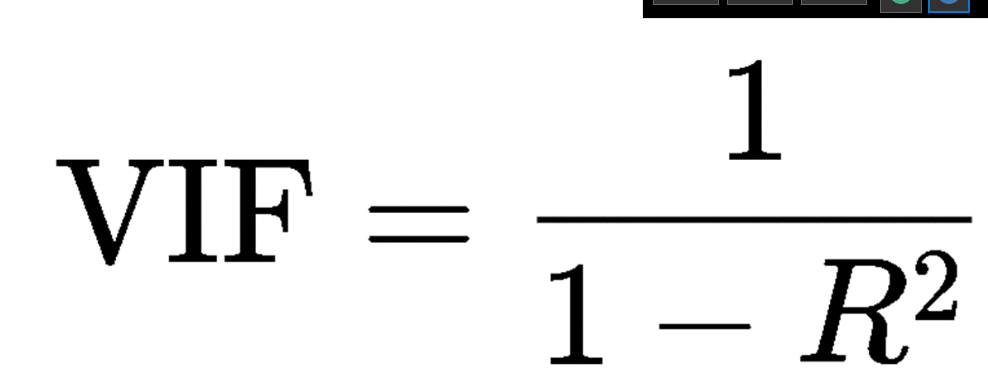


R^2越靠近1表示X2與X3越能表示X1 表示共線機率大
使用X2與X3預測X1的R^2是多少 作為VIF的R^2
VIF越大表示共線性越大


In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
print(X_new.shape)
print(X_new.shape[1])
VIF = [variance_inflation_factor(X_new,i) for i in range(X_new.shape[1])]
print("VIF:",VIF)


(100, 2)
2
VIF: [inf, inf]


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
data = pd.read_csv("BMI.csv")
#data.head()
data["Gander"] = data["Gender"].map({"Male":0,"Female":1})
X = data[["Gander","Height","Weight"]]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data
#VIF 值大於 5 或 10 通常會被認為存在多重共線性。

,feature,VIF
0,Gander,1.865292
1,Weight,1.865292


# Sequential Feature Selection(SFS)

In [47]:
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## 載入資料

In [48]:
X,y = load_wine(return_X_y=True,as_frame=True)

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X.values,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((124, 13), (54, 13), (124,), (54,))

## 特徵縮放

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 選擇演算法

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

## 模型訓練

In [55]:
clf.fit(X_train_std,y_train)    

LogisticRegression()

In [56]:
clf.score(X_test_std,y_test)

0.9814814814814815

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector
knn = KNeighborsClassifier(n_neighbors=11)
sfs = SequentialFeatureSelector(knn,n_features_to_select=3)
sfs.fit(X_train_std,y_train)
sfs.get_support()

array([False, False, False, False, False, False,  True, False, False,
        True, False, False,  True])

In [59]:
column_list = np.array(X.columns.to_list())
column_list[sfs.get_support()]

array(['flavanoids', 'color_intensity', 'proline'], dtype='<U28')

In [60]:
sfs.get_feature_names_out(column_list)

array(['flavanoids', 'color_intensity', 'proline'], dtype=object)

In [61]:
sfs.transform(X_train_std).shape

(124, 3)

In [62]:
clf = LogisticRegression()
clf.fit(sfs.transform(X_train_std),y_train)

LogisticRegression()

In [63]:
clf.score(sfs.transform(X_test_std),y_test)

0.9814814814814815

In [ ]:
#簡易的自行開發作法 
#3組合分數最高的特徵值
import itertools
#itertools.combinations(list,3)